## Evaluation of adiabatic modeling of surfaces 



In [43]:
import pandas as pd
import os 
import geopandas as gpd
import glob
import matplotlib as plt

In [5]:
DG_RESULTS_ADIABATIC = r"C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle\Districtgenerator\20252001 - Kopie"
DG_RESULTS = r"C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle\Districtgenerator\20252001"
DG_MAPPING = r"C:\Users\felix\Programmieren\DVG\TECDEM\data\scenario_sheets\20250120_Mierendorff_Scenario.csv"

In [7]:
# Load file for checking which gml files belongs to which block
block_gml = pd.read_csv(r'data\auxillary\buildings_and_building_parts.csv')

In [16]:
dg_mapping

,id,building,year,groundArea,area,gml_id,retrofit
0,0,AB,1900.0,820.155762,6561.246094,DEBE3D04YY50000BlO,0
1,1,AB,1905.0,687.706055,6189.354492,DEBE3D04YY50000Rac,0
2,2,IWU Transport,1905.0,23.834473,15.254062,DEBE3D04YY50000DCT,0
3,3,AB,1905.0,196.165282,1569.322254,DEBE3D04YY50000Lev,0
4,4,AB,1905.0,271.322998,2401.065185,DEBE3D04YY500002JB,0
...,...,...,...,...,...,...,...
515,515,"IWU Production, Workshop, Warehouse or Operations",2005.0,936.446045,2444.124177,DEBE3D04YY50000F8S,0
516,516,TH,1905.0,11.615479,11.615479,DEBE3D04YY50002ciJ,0
517,517,AB,1905.0,1017.712891,5088.564453,DEBE3D04YY50000Qwb,0
518,518,MFH,2005.0,243.186523,486.373047,DEBE3D04YY500003sF,0


In [19]:
block_gml

,geometry,coordinates,gml_id,building_part_id,index_right,blknr,bez,bezname,plr,blktypname,ewk,area,datum
0,POLYGON ((190173.32861862011 173162.3613194087...,"[[384976.272, 5820790.551, 32.65], [384977.076...",DEBE3D04YY50000BlO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,819.436562,1994/06/01 00:00:00.000
1,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
2,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,DEBE3DPcFE8lkbYV,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
3,POLYGON ((190229.7310809504 173193.26077722237...,"[[385034.496, 5820817.93, 32.036], [385034.49,...",DEBE3D04YY50000QXO,DEBE3DpnBYcjfpwT,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,30.939735,1994/06/01 00:00:00.000
4,POLYGON ((190219.01940630068 173206.1636086045...,"[[385024.595, 5820831.474, 32.036], [385016.24...",DEBE3D04YY50000QXO,DEBE3DwERcC6Wilv,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,142.857381,1994/06/01 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,POLYGON ((190305.77994175444 173621.6548446716...,"[[385136.83, 5821241.012, 33.78], [385128.525,...",DEBE3D04AL2vw0000q,NaN,3,19692,4,Charlottenburg-Wilmersdorf,4300518,Block,unbewohnt,2662.163138,2007/05/21 00:00:00.000
1896,POLYGON ((190305.77994175444 173621.6548446716...,"[[385136.83, 5821241.012, 33.78], [385128.525,...",DEBE3D04AL2vw0000q,UUID_ca668bfd-7000-4d83-a899-a88e0bfca2f0,3,19692,4,Charlottenburg-Wilmersdorf,4300518,Block,unbewohnt,2662.163138,2007/05/21 00:00:00.000
1897,POLYGON ((190334.37755328265 173618.0717075566...,"[[385165.165, 5821235.672, 33.78], [385139.21,...",DEBE3D04AL2vw0000q,DEBE04AL2vw0000q_01,3,19692,4,Charlottenburg-Wilmersdorf,4300518,Block,unbewohnt,295.848454,2007/05/21 00:00:00.000
1898,POLYGON ((190333.12898726357 173622.4331540164...,"[[385164.187, 5821240.104, 33.822], [385163.54...",DEBE3D04AL2vw0000q,DEBE04AL2vw0000q_02,3,19692,4,Charlottenburg-Wilmersdorf,4300518,Block,unbewohnt,6.633651,2007/05/21 00:00:00.000


In [33]:
# Code to get data for districtgenerator 
# Need to update 


block_data = gpd.read_file(r'data\auxillary\00_block_shape.shp')
outer_mierendorff = ["019609", "019017", "019808", "019901", "020902", "019708"]
#block_data['blknr'] = block_data["blknr"].astype(str)
block_data = block_data[~block_data["blknr"].isin(outer_mierendorff)]

dg_mapping = pd.read_csv(DG_MAPPING, sep=";")

data_dict_dg = {
    "project": [],
    "blknr": [],
    "Heat MWhyr 2020": [],
    "DHW MWhyr 2020": [],
    "Elec MWhyr 2020": [],
    "Heat MWhyr 2021": [],
    "DHW MWhyr 2021": [],
    "Elec MWhyr 2021": [],
    "Heat MWhyr 2022": [],
    "DHW MWhyr 2022": [],
    "Elec MWhyr 2022": [],
}

for project in os.listdir(DG_RESULTS):
   if not os.path.isdir(os.path.join(DG_RESULTS, project)):
        continue
   else:
        for blk in block_data["blknr"].unique():
            buildings_in_block = block_gml[block_gml["blknr"] == int(blk)]
            ids1 = buildings_in_block["gml_id"].dropna().unique()
            ids2 = buildings_in_block["building_part_id"].dropna().unique()
            gml_ids = set(ids1).union(ids2)
    
            relevant_ids = dg_mapping[dg_mapping['gml_id'].isin(gml_ids)]
            if relevant_ids.empty:
                print(f"No relevant IDs found for block {blk}")
                print(gml_ids)
            
            else:
                data_dict_dg["blknr"].append(blk)
                data_dict_dg["project"].append(project)   
                for year in [2020, 2021, 2022]:
                    heat_sum = 0
                    dhw_sum = 0
                    elec_sum = 0
                    relevant_files = []
                    for index, row in relevant_ids.iterrows():
                        file_pattern = os.path.join(
                            DG_RESULTS, 
                            f"{project}", f"{year}",
                            f"{row['id']}_{row['building']}*.csv"
                        )
                        matching_files = glob.glob(file_pattern)
                        if matching_files:
                            relevant_files.extend(matching_files)

                    if not relevant_files:
                        print(f"No relevant files found for block {blk}, year {year}")
                        print(f"scenario {project} and file pattern {file_pattern}")
                        data_dict_dg[f"Heat MWhyr {year}"].append(None)
                        data_dict_dg[f"DHW MWhyr {year}"].append(None)
                        data_dict_dg[f"Elec MWhyr {year}"].append(None)
                        continue

                    for file in relevant_files:
                        df_dg = pd.read_csv(file, sep=',', decimal=".")
                        heat_sum += df_dg["heat"].sum()
                        dhw_sum += df_dg["dhw"].sum()
                        elec_sum += df_dg["elec"].sum()

                    # Convert from Wh to MWh by dividing by 1,000,000
                    heat_value = heat_sum / 1_000_000 if heat_sum != 0 else None
                    dhw_value = dhw_sum / 1_000_000 if dhw_sum != 0 else None
                    elec_value = elec_sum / 1_000_000 if elec_sum != 0 else None

                    data_dict_dg[f"Heat MWhyr {year}"].append(heat_value)
                    data_dict_dg[f"DHW MWhyr {year}"].append(dhw_value)
                    data_dict_dg[f"Elec MWhyr {year}"].append(elec_value)
                                 



No relevant IDs found for block 019033
{'DEBE3D04YY50000NMQ', 'UUID_62746662-3788-4d77-ace1-d47e7330e4c8', 'DEBE3DcA7spevQNE', 'DEBE3D04YY500005p2', 'DEBE00YYNv0000Bv_01', 'DEBE3D04YY50002bvp', 'DEBE3D04YY50000PWf', 'DEBE3D04YY50000RJv', 'DEBE04YY500007aH_01', 'DEBE3D04YY50002cGN', 'DEBE3D04YY50002cUy', 'DEBE3DhdQUDYSNvE', 'DEBE3D04YY500003H4', 'DEBE3D04YY50002bvX', 'DEBE3D04YY50000Cu4', 'DEBE3D04YY50000L7H', 'DEBE3D04YY50000EA1', 'UUID_c472bd67-367f-4657-adc1-c2da9e8a5c88', 'DEBE3DGgG8Z4iQcW', 'DEBE3Dsi9tvRsPLq', 'DEBE3D04YY50002ccC', 'UUID_8c443949-dd15-4352-9b3b-67411014179a', 'DEBE3DF8p5Wv6sps', 'DEBE04YY500003H4_01', 'DEBE3D04YY50002brW', 'DEBE3D04YY500007aH', 'DEBE3Dv2TpzhoRaN', 'DEBE04YY50000Qyp_01', 'DEBE3D04YY500005xe', 'DEBE04YY50000EA1_01', 'DEBE3D04YY5000071d', 'DEBE04YY500007aH_04', 'DEBE04YY500007XO_01', 'DEBE3D04YY50000Afw', 'DEBE3DDOWZ0fI0Pt', 'DEBE3Dmc3LxUGBnK', 'DEBE3D04YY50000Dil', 'UUID_5c6506e6-bcb7-4337-93e3-bae7fb1ffb9e', 'DEBE04YY50000EA1_02', 'DEBE3D04YY50002cM

In [32]:
data_dict_dg_adiabatic = {
    "project": [],
    "blknr": [],
    "Heat MWhyr 2020": [],
    "DHW MWhyr 2020": [],
    "Elec MWhyr 2020": [],
    "Heat MWhyr 2021": [],
    "DHW MWhyr 2021": [],
    "Elec MWhyr 2021": [],
    "Heat MWhyr 2022": [],
    "DHW MWhyr 2022": [],
    "Elec MWhyr 2022": [],
}


for project in os.listdir(DG_RESULTS_ADIABATIC):
   if not os.path.isdir(os.path.join(DG_RESULTS_ADIABATIC, project)):
        continue
   else:

        for blk in block_data["blknr"]:
            gml_ids = set()
            buildings_in_block = block_gml[block_gml["blknr"] == int(blk)]
            ids1 = buildings_in_block["gml_id"].dropna().unique()
            ids2 = buildings_in_block["building_part_id"].dropna().unique()
            gml_ids = set(ids1).union(ids2)
        
    
            relevant_ids = dg_mapping[dg_mapping['gml_id'].isin(gml_ids)]
            if relevant_ids.empty:
                print(f"No relevant IDs found for block {blk}")
            
            else:
                data_dict_dg_adiabatic["blknr"].append(blk)
                data_dict_dg_adiabatic["project"].append(project)   
                for year in [2020, 2021, 2022]:
                    heat_sum = 0
                    dhw_sum = 0
                    elec_sum = 0
                    relevant_files = []
                    for index, row in relevant_ids.iterrows():
                        file_pattern = os.path.join(
                            DG_RESULTS_ADIABATIC, 
                            f"{project}", f"{year}",
                            f"{row['id']}_{row['building']}*.csv"
                        )
                        matching_files = glob.glob(file_pattern)
                        if matching_files:
                            relevant_files.extend(matching_files)

                    if not relevant_files:
                        print(f"No relevant files found for block {blk}, year {year}")
                        print(f"scenario {project} and file pattern {file_pattern}")
                        data_dict_dg_adiabatic[f"Heat MWhyr {year}"].append(None)
                        data_dict_dg_adiabatic[f"DHW MWhyr {year}"].append(None)
                        data_dict_dg_adiabatic[f"Elec MWhyr {year}"].append(None)
                        continue

                    for file in relevant_files:
                        df_dg = pd.read_csv(file, sep=',', decimal=".")
                        heat_sum += df_dg["heat"].sum()
                        dhw_sum += df_dg["dhw"].sum()
                        elec_sum += df_dg["elec"].sum()

                    # Convert from Wh to MWh by dividing by 1,000,000
                    heat_value = heat_sum / 1_000_000 if heat_sum != 0 else None
                    dhw_value = dhw_sum / 1_000_000 if dhw_sum != 0 else None
                    elec_value = elec_sum / 1_000_000 if elec_sum != 0 else None

                    data_dict_dg_adiabatic[f"Heat MWhyr {year}"].append(heat_value)
                    data_dict_dg_adiabatic[f"DHW MWhyr {year}"].append(dhw_value)
                    data_dict_dg_adiabatic[f"Elec MWhyr {year}"].append(elec_value)
                                 



No relevant IDs found for block 019033
No relevant IDs found for block 019692
No relevant IDs found for block 019759
No relevant IDs found for block 019760
No relevant IDs found for block 020020
No relevant IDs found for block 020028
No relevant IDs found for block 020038
No relevant IDs found for block 020053
No relevant IDs found for block 020054
No relevant IDs found for block 021062
No relevant IDs found for block 019033
No relevant IDs found for block 019692
No relevant IDs found for block 019759
No relevant IDs found for block 019760
No relevant IDs found for block 020020
No relevant IDs found for block 020028
No relevant IDs found for block 020038
No relevant IDs found for block 020053
No relevant IDs found for block 020054
No relevant IDs found for block 021062
No relevant IDs found for block 019033
No relevant IDs found for block 019692
No relevant IDs found for block 019759
No relevant IDs found for block 019760
No relevant IDs found for block 020020
No relevant IDs found for

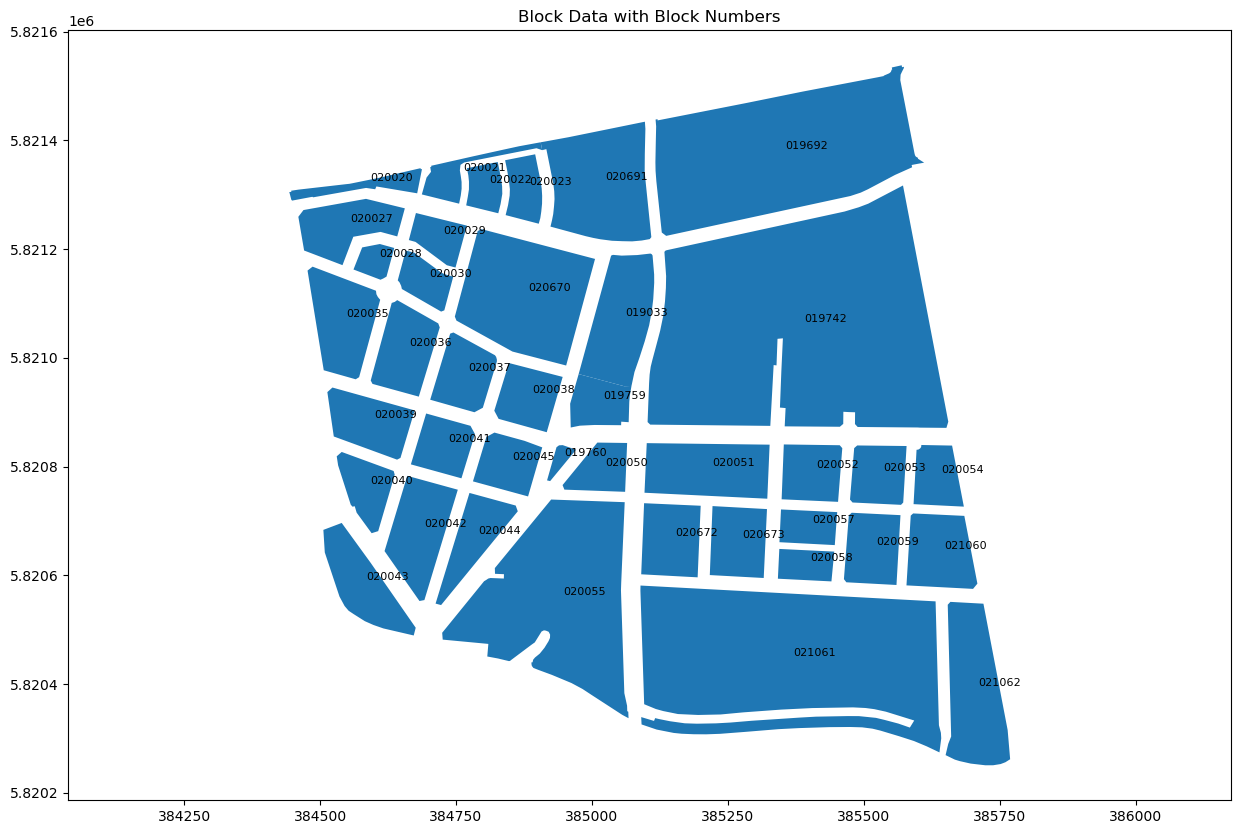

In [45]:
import matplotlib.pyplot as plt

# Plot the geometries
fig, ax = plt.subplots(figsize=(15, 10))
block_data.plot(ax=ax)

# Add block numbers as labels
for idx, row in block_data.iterrows():
    # Get centroid of polygon for label placement
    centroid = row.geometry.centroid
    ax.annotate(row['blknr'], 
                xy=(centroid.x, centroid.y),
                xytext=(3, 3), # Small offset from point
                textcoords="offset points",
                fontsize=8)

plt.title('Block Data with Block Numbers')
plt.axis('equal')
plt.show()

In [48]:

    for blk in [20035, 20055]:
        gml_ids = set()
        buildings_in_block = block_gml[block_gml["blknr"] == int(blk)]
        ids1 = buildings_in_block["gml_id"].dropna().unique()
        ids2 = buildings_in_block["building_part_id"].dropna().unique()
        gml_ids = set(ids1).union(ids2)

    

        relevant_ids = dg_mapping[dg_mapping['gml_id'].isin(gml_ids)]
        if relevant_ids.empty:
            print(f"No relevant IDs found for block {blk}")
        else:
            print(blk, relevant_ids)
        


20035       id                                           building    year  \
166  166  IWU Office, Administrative or Government Build...  1925.0   
192  192                                      IWU Transport  1925.0   
219  219  IWU Office, Administrative or Government Build...  1925.0   
221  221                                                 TH  1925.0   
233  233                                                 TH  1925.0   
244  244                                                 AB  1925.0   

      groundArea          area              gml_id  retrofit  
166  6463.166992  40717.952051  DEBE3D04YY500008YZ         0  
192  1126.908936    721.221719  DEBE3D04YY50000JHW         0  
219   709.181152   6161.330127  DEBE3D04YY500004wz         0  
221     4.804443      9.608887  DEBE3D04YY50002cOZ         0  
233     8.564697     17.129395  DEBE3D04YY50002buK         0  
244  2428.063721  19424.509766  DEBE3D04YY50000PDF         0  
20055       id                                         

In [34]:
# Convert dictionaries to DataFrames for easier comparison
df_adiabatic = pd.DataFrame(data_dict_dg_adiabatic)
df_baseline = pd.DataFrame(data_dict_dg)

# Merge the two DataFrames on block number and project
df_comparison = pd.merge(df_adiabatic, df_baseline, 
                        on=['blknr', 'project'],
                        suffixes=('_adiabatic', '_baseline'))

# Calculate differences for each year and energy type
for year in [2020, 2021, 2022]:
    for energy_type in ['Heat', 'DHW', 'Elec']:
        col_name = f"{energy_type} MWhyr {year}"
        diff_col = f"{energy_type} Difference {year} (MWhyr)"
        pct_diff_col = f"{energy_type} Percentage Difference {year} (%)"
        
        # Calculate absolute difference
        df_comparison[diff_col] = (
            df_comparison[f"{col_name}_adiabatic"] - 
            df_comparison[f"{col_name}_baseline"]
        )
        
        # Calculate percentage difference
        df_comparison[pct_diff_col] = (
            (df_comparison[f"{col_name}_adiabatic"] - 
             df_comparison[f"{col_name}_baseline"]) / 
            df_comparison[f"{col_name}_baseline"] * 100
        )

# Display summary statistics
print("Summary of differences between adiabatic and baseline scenarios:")

# Get unique projects
projects = df_comparison['project'].unique()

# Overall statistics
print("\nOverall mean differences by year and energy type:")
for year in [2020, 2021, 2022]:
    print(f"\nYear {year}:")
    for energy_type in ['Heat', 'DHW', 'Elec']:
        diff_col = f"{energy_type} Difference {year} (MWhyr)"
        pct_diff_col = f"{energy_type} Percentage Difference {year} (%)"
        
        mean_diff = df_comparison[diff_col].mean()
        mean_pct = df_comparison[pct_diff_col].mean()
        
        print(f"{energy_type}:")
        print(f"  Average absolute difference: {mean_diff:.2f} MWhyr")
        print(f"  Average percentage difference: {mean_pct:.2f}%")

# Per project statistics
print("\nMean differences by project, year and energy type:")
for project in projects:
    print(f"\nProject: {project}")
    project_data = df_comparison[df_comparison['project'] == project]
    
    for year in [2020, 2021, 2022]:
        print(f"\n  Year {year}:")
        for energy_type in ['Heat', 'DHW', 'Elec']:
            diff_col = f"{energy_type} Difference {year} (MWhyr)"
            pct_diff_col = f"{energy_type} Percentage Difference {year} (%)"
            
            mean_diff = project_data[diff_col].mean()
            mean_pct = project_data[pct_diff_col].mean()
            
            print(f"  {energy_type}:")
            print(f"    Average absolute difference: {mean_diff:.2f} MWhyr")
            print(f"    Average percentage difference: {mean_pct:.2f}%")


Summary of differences between adiabatic and baseline scenarios:

Overall mean differences by year and energy type:

Year 2020:
Heat:
  Average absolute difference: -85.08 MWhyr
  Average percentage difference: 0.22%
DHW:
  Average absolute difference: 0.91 MWhyr
  Average percentage difference: 1.95%
Elec:
  Average absolute difference: -15.60 MWhyr
  Average percentage difference: 0.32%

Year 2021:
Heat:
  Average absolute difference: -514.77 MWhyr
  Average percentage difference: -11.06%
DHW:
  Average absolute difference: 4.52 MWhyr
  Average percentage difference: 3.85%
Elec:
  Average absolute difference: 15.42 MWhyr
  Average percentage difference: 2.38%

Year 2022:
Heat:
  Average absolute difference: -101.91 MWhyr
  Average percentage difference: 0.30%
DHW:
  Average absolute difference: 2.72 MWhyr
  Average percentage difference: 0.78%
Elec:
  Average absolute difference: 4.84 MWhyr
  Average percentage difference: 0.86%

Mean differences by project, year and energy type:

Pr

In [14]:
df_comparison

,project,blknr,Heat MWhyr 2020_adiabatic,DHW MWhyr 2020_adiabatic,Elec MWhyr 2020_adiabatic,Heat MWhyr 2021_adiabatic,DHW MWhyr 2021_adiabatic,Elec MWhyr 2021_adiabatic,Heat MWhyr 2022_adiabatic,DHW MWhyr 2022_adiabatic,...,DHW Difference 2021 (MWhyr),DHW Percentage Difference 2021 (%),Elec Difference 2021 (MWhyr),Elec Percentage Difference 2021 (%),Heat Difference 2022 (MWhyr),Heat Percentage Difference 2022 (%),DHW Difference 2022 (MWhyr),DHW Percentage Difference 2022 (%),Elec Difference 2022 (MWhyr),Elec Percentage Difference 2022 (%)
0,Advanced_Retrofit,019742,9789.312613,1192.315660,3828.190086,9789.312613,1192.315660,3828.190086,8607.303444,1191.144580,...,-1.244076,-0.104232,-6.828482,-0.178056,-1666.430549,-16.220301,-7.688370,-0.641321,1238.603381,32.318827
1,Advanced_Retrofit,020021,4.583268,1.767063,3.857000,4.583268,1.767063,3.857000,6.071372,0.587410,...,0.594119,50.651957,0.807000,26.459016,0.264980,4.563595,-0.586207,-49.948720,-0.593000,-32.600330
2,Advanced_Retrofit,020022,781.744848,217.246175,358.260000,781.744848,217.246175,358.260000,840.920592,204.968019,...,25.248354,13.150334,3.518000,0.991707,116.882273,16.143106,-11.111490,-5.142316,-31.409000,-8.111012
3,Advanced_Retrofit,020023,573.113610,150.741128,277.955000,573.113610,150.741128,277.955000,616.060113,149.565055,...,5.275073,3.626326,8.710000,3.234972,66.253524,12.050333,0.673763,0.452520,-7.704000,-2.820769
4,Advanced_Retrofit,020027,2415.324495,599.906221,1083.985000,2415.324495,599.906221,1083.985000,2568.776130,610.668890,...,-14.178447,-2.308875,-4.025000,-0.369941,339.465861,15.227394,-28.144016,-4.405674,-34.198000,-3.029358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,No_Retrofit,020672,2172.749519,1624.252933,321.065326,2359.929706,1624.276644,383.849861,2114.026330,1625.442350,...,-4.732147,-0.290492,88.229989,29.845757,-86.140351,-3.915174,-0.614307,-0.037779,4.688165,1.218295
86,No_Retrofit,020673,3548.187133,293.724091,881.265160,4260.062350,296.172712,908.445549,3761.325623,287.911253,...,6.536465,2.256784,12.793857,1.428441,-235.693622,-5.896735,-31.784722,-9.942171,-190.249476,-17.524061
87,No_Retrofit,020691,5359.542210,816.188892,1123.097894,6480.551162,826.714973,1166.344453,5639.836799,832.080515,...,114.725657,16.113396,227.611405,24.246659,750.156531,15.341627,108.312894,14.965148,216.883155,22.498812
88,No_Retrofit,021060,3620.140752,444.903443,779.548385,4449.145022,431.900924,791.844456,3906.284086,446.616939,...,1.796942,0.417793,34.360119,4.536083,-178.452325,-4.368760,1.294031,0.290583,-10.522873,-1.317400
